In [1]:
import pandas as pd
df=pd.read_csv("/home/user/Downloads/Car_sales.csv")
print(df)

      Manufacturer              Model  Sales in thousands 4-year resale value  \
0    Acura          Integra                        16.919               16.36   
1    Acura          TL                             39.384              19.875   
2    Acura          CL                             14.114              18.225   
3    Acura          RL                              8.588              29.725   
4    Audi           A4                             20.397              22.255   
..             ...                ...                 ...                 ...   
152  Volvo          V40                             3.545                   .   
153  Volvo          S70                            15.245                   .   
154  Volvo          V70                            17.531                   .   
155  Volvo          C70                             3.493                   .   
156  Volvo          S80                            18.969                   .   

    Vehicle type Price in t

In [7]:
num_attributes = df.shape[1]
print("Number of attributes:", num_attributes)

Number of attributes: 15


In [8]:
print("DataFrame Info:")
print(df.info())
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    object 
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    object 
 6   Engine size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb weight          157 non-null    object 
 12  Fuel capacity        157 non-null    object 
 13  Fuel efficiency      157 non-null    object 
 14  Latest Launch        157 non-null    object 
dtypes: float64(1), object(14

In [9]:
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 157
Number of columns: 15


In [10]:
df_cleaned = df.drop_duplicates()
print("Number of rows before removing duplicates:", df.shape[0])
print("Number of rows after removing duplicates:",
df_cleaned.shape[0])

Number of rows before removing duplicates: 157
Number of rows after removing duplicates: 157


In [11]:
print("Summary Statistics for Numerical Variables:")
print(df.describe())

Summary Statistics for Numerical Variables:
       Sales in thousands
count          157.000000
mean            52.998076
std             68.029422
min              0.110000
25%             14.114000
50%             29.450000
75%             67.956000
max            540.561000


In [12]:
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64


In [16]:
df=df.isnull().sum().idxmax()
print(df)

Manufacturer


In [24]:
import pandas as pd
# Assuming df is already loaded
df = pd.read_csv("/home/user/Downloads/Car_sales.csv")
# Function to find min and max values of any column
def find_min_max(df, column_name):
 min_value = df[column_name].min()
 max_value = df[column_name].max()
# Find the rows with the min and max values
 min_row = df[df[column_name] == min_value]
 max_row = df[df[column_name] == max_value]
 return min_value, max_value, min_row, max_row
# Now call the function to find min and max for Horsepower
hp_min, hp_max, hp_min_row, hp_max_row = find_min_max(df,
"Horsepower")
print("\nHorsepower - Min:", hp_min, "\n", hp_min_row)
print("\nHorsepower - Max:", hp_max, "\n", hp_max_row)


Horsepower - Min: . 
      Manufacturer              Model  Sales in thousands 4-year resale value  \
33  Chrysler       Town & Country                  53.48               19.54   

   Vehicle type Price in thousands Engine size Horsepower Wheelbase Width  \
33          Car                  .           .          .         .     .   

   Length Curb weight Fuel capacity Fuel efficiency Latest Launch  
33      .           .             .               .     13-Jul-15  

Horsepower - Max: 92 
      Manufacturer              Model  Sales in thousands 4-year resale value  \
62  Hyundai        Accent                         41.184                5.86   

   Vehicle type Price in thousands Engine size Horsepower Wheelbase Width  \
62    Passenger              9.699         1.5         92      96.1  65.7   

   Length Curb weight Fuel capacity Fuel efficiency Latest Launch  
62  166.7        2.24          11.9              31      9-Oct-14  


In [25]:
# Get min and max horsepower values
hp_min = df["Horsepower"].min()
hp_max = df["Horsepower"].max()
# Get rows where horsepower is min/max
hp_min_row = df[df["Horsepower"] == hp_min]
hp_max_row = df[df["Horsepower"] == hp_max]
print("\nHorsepower - Min:", hp_min, "\n", hp_min_row)
print("\nHorsepower - Max:", hp_max, "\n", hp_max_row)


Horsepower - Min: . 
      Manufacturer              Model  Sales in thousands 4-year resale value  \
33  Chrysler       Town & Country                  53.48               19.54   

   Vehicle type Price in thousands Engine size Horsepower Wheelbase Width  \
33          Car                  .           .          .         .     .   

   Length Curb weight Fuel capacity Fuel efficiency Latest Launch  
33      .           .             .               .     13-Jul-15  

Horsepower - Max: 92 
      Manufacturer              Model  Sales in thousands 4-year resale value  \
62  Hyundai        Accent                         41.184                5.86   

   Vehicle type Price in thousands Engine size Horsepower Wheelbase Width  \
62    Passenger              9.699         1.5         92      96.1  65.7   

   Length Curb weight Fuel capacity Fuel efficiency Latest Launch  
62  166.7        2.24          11.9              31      9-Oct-14  


In [28]:
import pandas as pd
from scipy.stats import gaussian_kde
# Load dataset
df = pd.read_csv("/home/user/Downloads/Car_sales.csv")
df.columns = df.columns.str.strip()
if "Length" in df.columns:
    df["Length"] = pd.to_numeric(df["Length"], errors="coerce")
data = df["Length"].dropna()
kde = gaussian_kde(data)
density_values = kde.evaluate(data)
result = pd.DataFrame({'Length': data, 'Density': density_values})
print(result.head())
else:
print("Error: 'Length' column not found in the dataset.")

SyntaxError: invalid syntax (582344487.py, line 13)

In [29]:
# Check missing values before imputation
print("Missing values before:\n", df.isnull().sum())
df["Sales in thousands"].fillna(df["Sales in thousands"].mean(),
inplace=True)
print("Missing values after:\n", df.isnull().sum())
print(df.head())

Missing values before:
 Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64
Missing values after:
 Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64
    Manufacturer              Model  Sales in thousands 4-year resale value  \
0  Acura          Integra                        16.919               16.36   
1  Acura          T

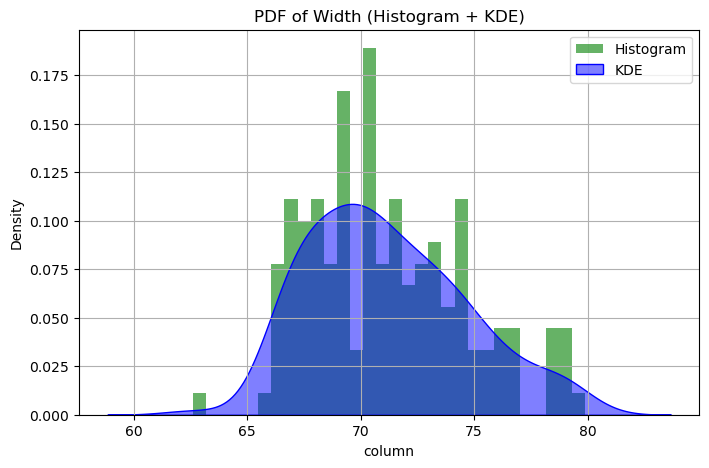

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns 
df['Width'] = pd.to_numeric(df['Width'], errors='coerce')
plt.figure(figsize=(8, 5))
plt.hist(df['Width'], bins=30, density=True, alpha=0.6,
color="green", label="Histogram")
sns.kdeplot(df['Width'], fill=True, color="blue", alpha=0.5,
label="KDE")
plt.xlabel("column")
plt.ylabel("Density")
plt.title(f"PDF of {'Width'} (Histogram + KDE)")
plt.legend()
plt.grid()
plt.show()

In [41]:
print(df['Horsepower'].dtype)

object


In [45]:
manufacturer_counts =df.groupby('Manufacturer').size().reset_index(name='Count')
print(manufacturer_counts)

     Manufacturer  Count
0   Acura              4
1   Audi               3
2   BMW                3
3   Buick              4
4   Cadillac           5
5   Chevrolet          9
6   Chrysler           7
7   Dodge             11
8   Ford              11
9   Honda              5
10  Hyundai            3
11  Infiniti           1
12  Jaguar             1
13  Jeep               3
14  Lexus              6
15  Lincoln            3
16  Mercedes-Benz      9
17  Mercury            6
18  Mitsubishi         7
19  Nissan             7
20  Oldsmobile         6
21  Plymouth           4
22  Pontiac            6
23  Porsche            3
24  Saab               2
25  Saturn             5
26  Subaru             2
27  Toyota             9
28  Volkswagen         6
29  Volvo              6


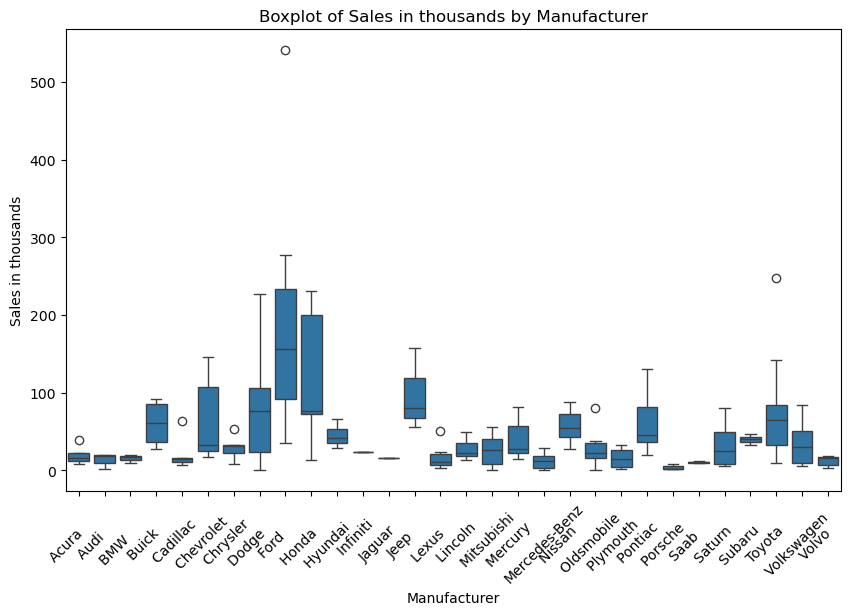

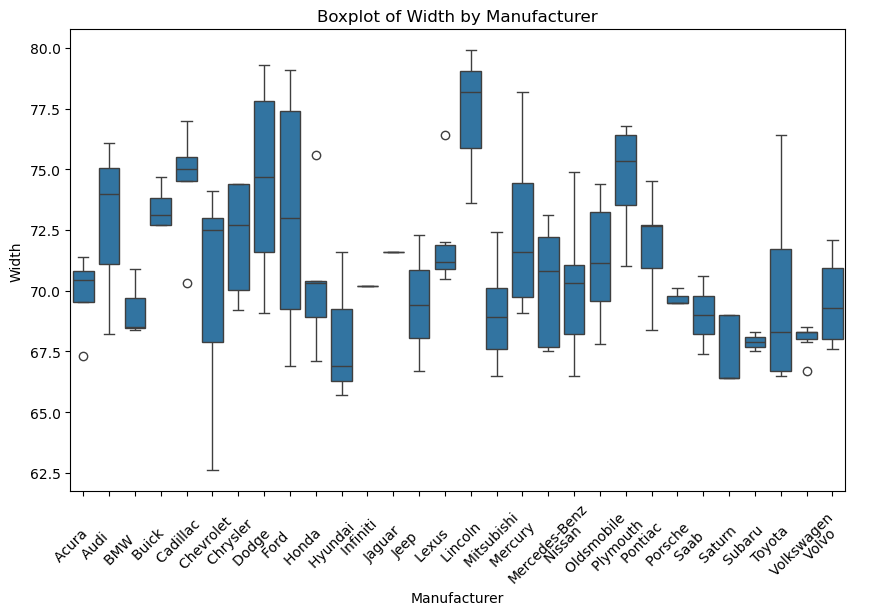

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df.columns = df.columns.str.strip()
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = [col for col in numerical_columns if col !='Manufacturer']
if 'Manufacturer' in df.columns:
# Create boxplots for each numerical column with respect to'Manufacturer'
 for col in numerical_columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='Manufacturer', y=col, data=df)
  plt.title(f'Boxplot of {col} by Manufacturer')
  plt.xlabel('Manufacturer')
  plt.ylabel(col)
  plt.xticks(rotation=45)
  plt.show()
else:
 print("Error: 'Manufacturer' column not found in the dataset.")

In [55]:
import pandas as pd
print("Column names in the dataset:")
print(df.columns)
sales_column = [col for col in df.columns if 'sales' in col.lower()]
if not sales_column:
 raise KeyError("No column related to 'sales' found in the dataset.Please check the column names.")
sales_column_name = sales_column[0]
print(f"Using column '{sales_column_name}' as the sales column.")
y = df[sales_column_name]
X = df.drop(columns=[sales_column_name])
print("\nShape of X (input):", X.shape)
print("Shape of y (output):", y.shape)
print("\nInput (X):")
print(X.head())
print("\nOutput (y):")
print(y.head())

Column names in the dataset:
Index(['Manufacturer', 'Model', 'Sales in thousands', '4-year resale value',
       'Vehicle type', 'Price in thousands', 'Engine size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb weight', 'Fuel capacity',
       'Fuel efficiency', 'Latest Launch'],
      dtype='object')
Using column 'Sales in thousands' as the sales column.

Shape of X (input): (157, 14)
Shape of y (output): (157,)

Input (X):
    Manufacturer              Model 4-year resale value Vehicle type  \
0  Acura          Integra                         16.36    Passenger   
1  Acura          TL                             19.875    Passenger   
2  Acura          CL                             18.225    Passenger   
3  Acura          RL                             29.725    Passenger   
4  Audi           A4                             22.255    Passenger   

  Price in thousands Engine size Horsepower Wheelbase  Width Length  \
0               21.5         1.8        140     101.2

In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data = {'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Yellow']}
df = pd.DataFrame(data)
encoder = LabelEncoder()
df['Color_encoded'] = encoder.fit_transform(df['Color'])
print(df)

    Color  Color_encoded
0     Red              2
1    Blue              0
2   Green              1
3    Blue              0
4     Red              2
5  Yellow              3


In [68]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("/home/user/Downloads/Car_sales.csv")
print("Column names in the dataset:")
print(df.columns)
sales_column = [col for col in df.columns if 'sales' in col.lower()]
if not sales_column:
 raise KeyError("No column related to 'sales' found in the dataset.Please check the column names.")
sales_column_name = sales_column[0]
print(f"Using column '{sales_column_name}' as the sales column.")
y = df[sales_column_name]
X = df.drop(columns=[sales_column_name])
categorical_columns = X.select_dtypes(include=['object',
'category']).columns
label_encoders = {}
for col in categorical_columns:
 le = LabelEncoder()
 X[col] = le.fit_transform(X[col])
 label_encoders[col] = le
print("\nShape of X (input):", X.shape)
print("Shape of y (output):", y.shape)
print("\nInput (X) with encoded categorical variables:")
print(X.head())
print("\nOutput (y):")
print(y.head())
for col in categorical_columns:
 print(f"\nMapping for {col}:")
 print(dict(zip(label_encoders[col].classes_,
label_encoders[col].transform(label_encoders[col].classes_))))

Column names in the dataset:
Index(['Manufacturer', 'Model', 'Sales in thousands', '4-year resale value',
       'Vehicle type', 'Price in thousands', 'Engine size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb weight', 'Fuel capacity',
       'Fuel efficiency', 'Latest Launch'],
      dtype='object')
Using column 'Sales in thousands' as the sales column.

Shape of X (input): (157, 14)
Shape of y (output): (157,)

Input (X) with encoded categorical variables:
   Manufacturer  Model  4-year resale value  Vehicle type  Price in thousands  \
0             0     79                   53             1                  59   
1             0    143                   70             1                 102   
2             0     25                   63             1                   0   
3             0    115                   87             1                 130   
4             1      8                   78             1                  77   

   Engine size  Horsepower  Wheelba

In [60]:
import pandas as pd
data = {'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']}
df = pd.DataFrame(data)
df_encoded = pd.get_dummies(df, columns=['Color'])
print(df_encoded)

   Color_Blue  Color_Green  Color_Red
0       False        False       True
1        True        False      False
2       False         True      False
3        True        False      False
4       False        False       True


In [64]:
import pandas as pd
df.columns = df.columns.str.strip()
print("Available columns:", df.columns)
if 'Vehicle type' in df.columns:
 df = pd.get_dummies(df, columns=['Vehicle type'],
 prefix='Vehicle', drop_first=True)
 print(df.head())
else:
 print("Error: 'Vehicle type' column not found in the dataset.")

Available columns: Index(['Color'], dtype='object')
Error: 'Vehicle type' column not found in the dataset.


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
df=pd.read_csv("/home/user/Downloads/Car_sales.csv")
df.columns = df.columns.str.strip()
X = df.drop(columns=['Sales in thousands'])
y = df['Sales in thousands']
X_train, X_temp, y_train, y_temp = train_test_split(X, y,
test_size=0.30, random_state=42)
X_test, _, y_test, _ = train_test_split(X_temp, y_temp,
test_size=2/3, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (109, 14) (109,)
Test set shape: (16, 14) (16,)


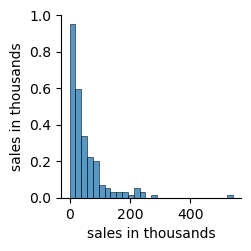

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df.columns = df.columns.str.lower()
sns.pairplot(df)
plt.show()

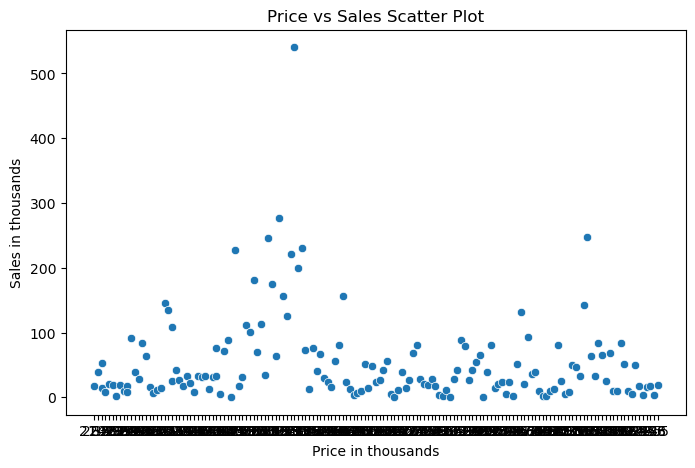

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df.columns = df.columns.str.lower()
price_col = next((col for col in df.columns if "price" in col), None)
sales_col = next((col for col in df.columns if "sales" in col or "units" in col), None)
if price_col and sales_col:
 plt.figure(figsize=(8, 5))
 sns.scatterplot(x=df[price_col], y=df[sales_col])
 plt.xlabel(price_col.capitalize())
 plt.ylabel(sales_col.capitalize())
 plt.title("Price vs Sales Scatter Plot")
 plt.show()
else:
 print("Error: Could not find 'price' and 'sales' columns.")

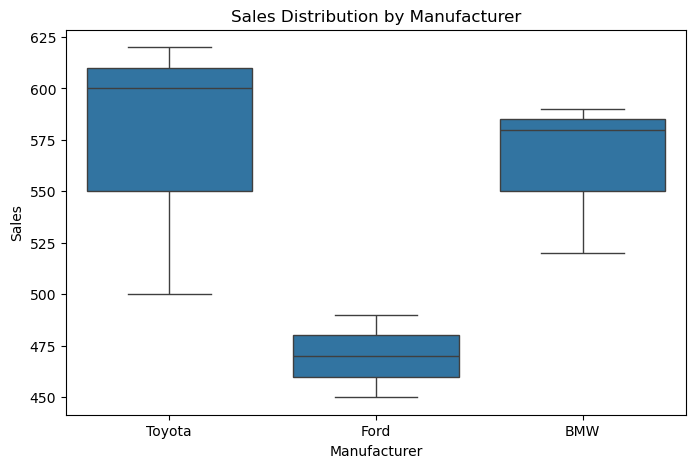

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Sample dataset with 'manufacturer' and 'sales' columns
data = {
"manufacturer": ["Toyota", "Ford", "BMW", "Toyota", "Ford",
"BMW", "Toyota", "Ford", "BMW"],
"sales": [500, 450, 520, 600, 490, 580, 620, 470, 590]
}
# Create DataFrame
df = pd.DataFrame(data)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["manufacturer"], y=df["sales"])
# Customize labels
plt.xlabel("Manufacturer")
plt.ylabel("Sales")
plt.title("Sales Distribution by Manufacturer")
plt.show()

In [80]:
data = {
"price": [20000, 25000, 30000, 35000, 40000, 45000, 50000],
"sales": [250, 200, 150, 130, 120, 100, 90]
}
df = pd.DataFrame(data)
correlation = df["price"].corr(df["sales"])
print("The correlation coefficient between price and sales is: {correlation}")

The correlation coefficient between price and sales is: {correlation}


In [82]:
import pandas as pd
data = {
"car": ["Toyota", "Ford", "BMW", "Honda", "Mercedes", "Audi",
"Nissan"],
"price": [20000, 25000, 30000, 35000, 40000, 45000, 50000],
"sales": [250, 200, 150, 130, 120, 100, 90]
}
df = pd.DataFrame(data)
df_sorted = df.sort_values(by="price")
least_expensive_car = df_sorted.iloc[0]
most_expensive_car = df_sorted.iloc[-1]
print("Least Expensive Car:")
print(least_expensive_car)
print("\nMost Expensive Car:")
print(most_expensive_car)

Least Expensive Car:
car      Toyota
price     20000
sales       250
Name: 0, dtype: object

Most Expensive Car:
car      Nissan
price     50000
sales        90
Name: 6, dtype: object


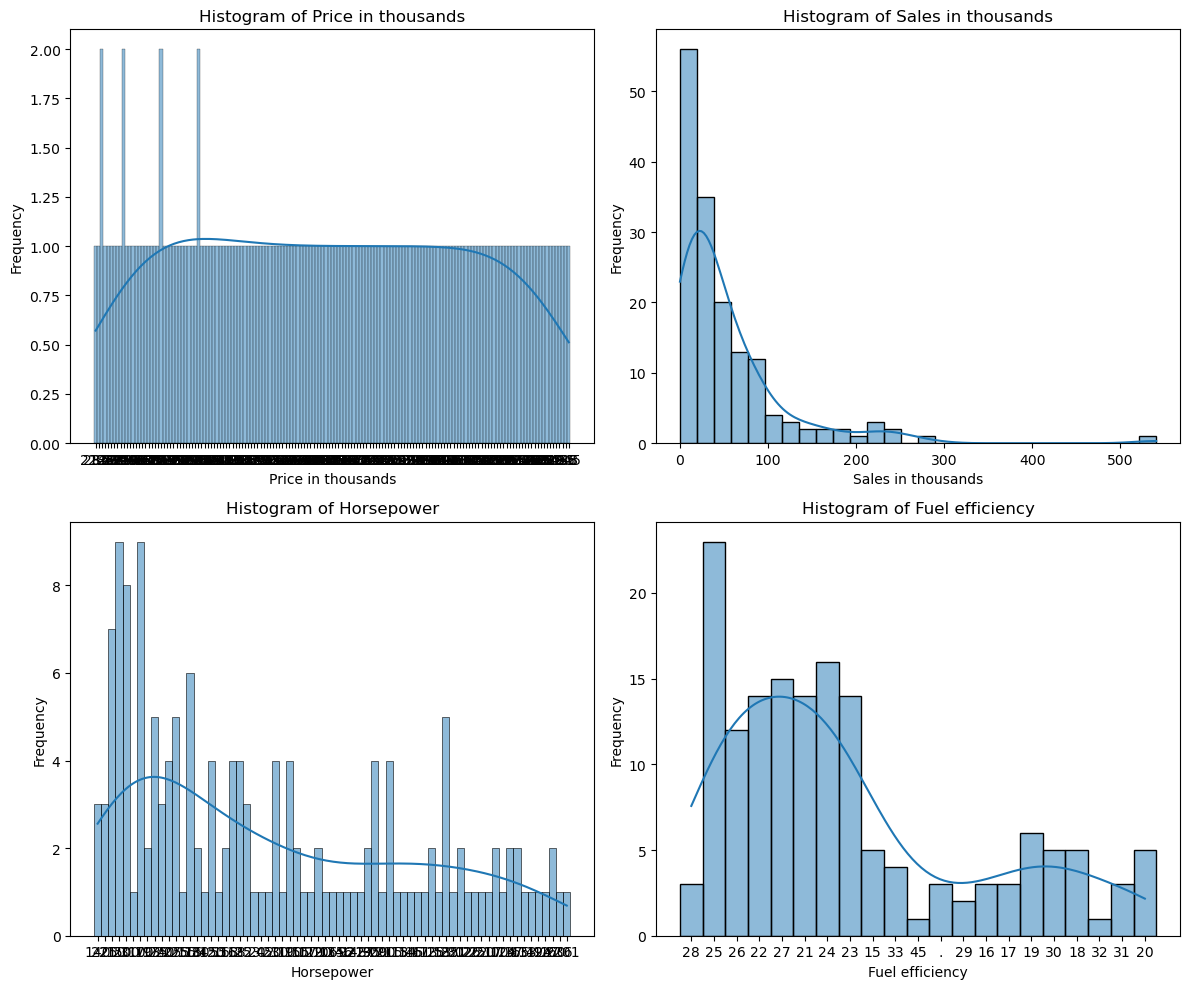

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
columns = ["Price in thousands", "Sales in thousands",
"Horsepower", "Fuel efficiency"]
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) # 2 rows and 2columns
for i, column in enumerate(columns):
# Determine row and column index for the subplot
 ax = axes[i // 2, i % 2]
 # Plot histogram
 sns.histplot(df[column], kde=True, ax=ax)
 ax.set_title(f"Histogram of {column.capitalize()}")
 ax.set_xlabel(column.capitalize())
 ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()